# GeoPandas - Sistemi di riferimento delle coordinate (Coordinate Reference Systems)

Il sistema di riferimento delle coordinate (CRS) è importante perché le forme geometriche in un oggetto `GeoSeries` o `GeoDataFrame` sono semplicemente una raccolta di coordinate in uno spazio arbitrario. Un CRS dice a Python come quelle coordinate si riferiscono ai luoghi sulla Terra.

🔗 [DOCS](https://geopandas.org/en/stable/docs/user_guide/projections.html#coordinate-reference-systems)

In [ ]:
!pip install geopandas

In [2]:
import geopandas as gpd

In [3]:
world = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/countries.zip')
world

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."
...,...,...,...,...,...,...
172,VUT,Vanuatu,Oceania,282814.0,723.0,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518..."
173,YEM,Yemen,Asia,28036829.0,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((19.89577 -24.76779, 20.16573 -24.917..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((23.21505 -17.52312, 22.56248 -16.898..."


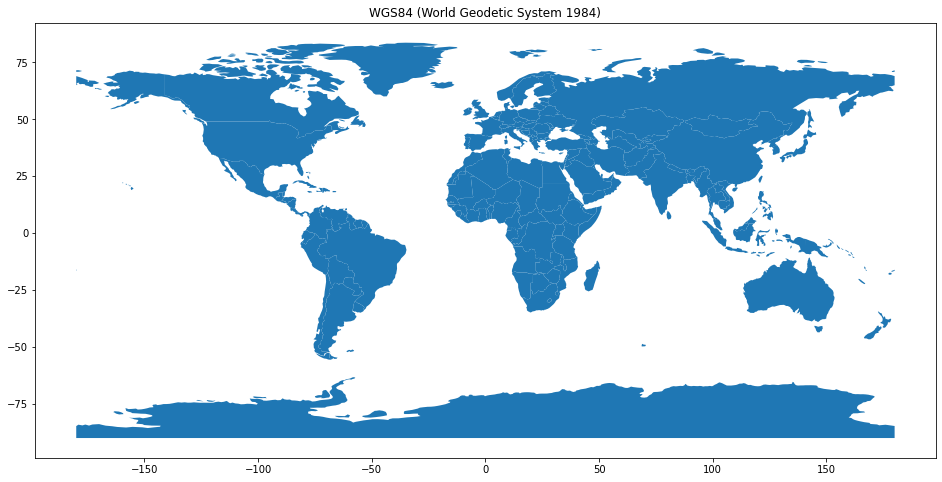

In [4]:
ax = world.plot(figsize=(20,8))
ax.set_title("WGS84 (World Geodetic System 1984)");

I `GeoDataFrame` vengono generalmente creati di default sul sistema di riferimento **EPSG 4326** (European Petroleum Survey Group)

In [5]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Tuttavia è possibile modificare questo valore utilizzando il metodo `geopandas.GeoDataFrame.to_crs()` specificando tra le parentesi il tipo di CRS da applicare.

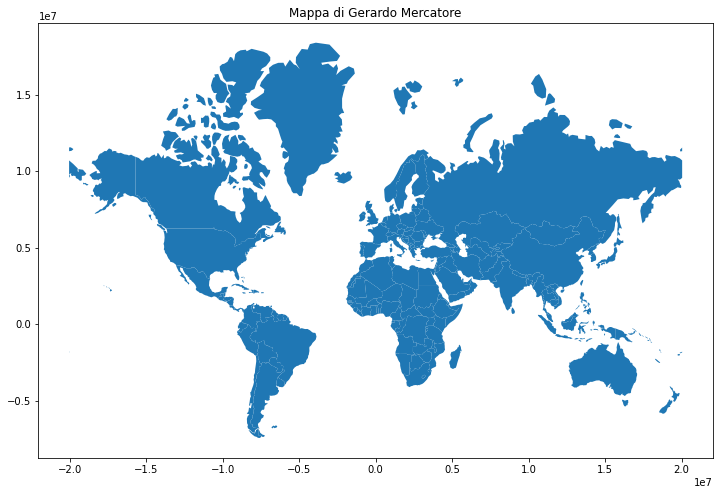

In [6]:
# Viene rimossa l'Antartide per evitare problemi quando si andrà a creare il grafico
mercator_world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
mercator_world = mercator_world.to_crs("EPSG:3395")

ax = mercator_world.plot(figsize=(20,8))
ax.set_title("Mappa di Gerardo Mercatore");

### Organizzare i  CRS

Quando si hanno diversi tipi di CRS <u>è necessario riorganizzartli</u> in un unico sistema, altrimenti risulteranno errati i risultati quando si andrà a creare la cartina

In [7]:
italy = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/ItalyProvinces_EPSG-3395.geojson')
italy.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

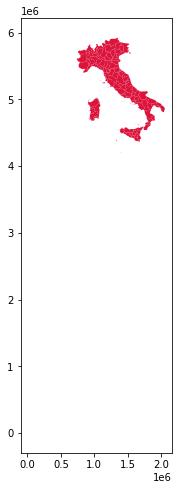

In [8]:
ax = world.plot(figsize=(20,8))
italy.plot(ax=ax, color='crimson')

Utilizzando il metodo `geopandas.GeoDataFrame.to_crs()` si va a ristabilire il riferimento cartesiano da utilizzare basandosi sulla mappa su cui verrà collocata l'area geografica

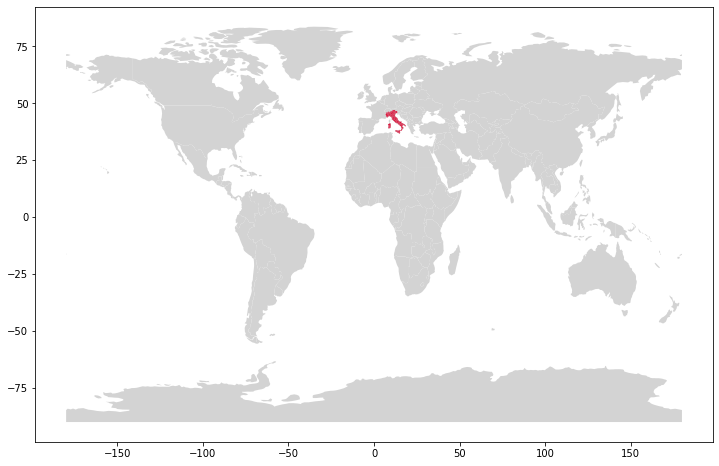

In [9]:
italy = italy.to_crs('EPSG:4326')

ax = world.plot(figsize=(20,8), color='lightgray')
italy.plot(ax=ax, color='crimson')